In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
train = pd.read_csv('titanic_train.csv')

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [111]:
train.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

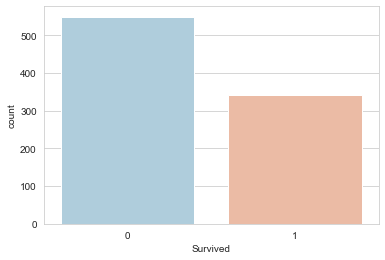

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

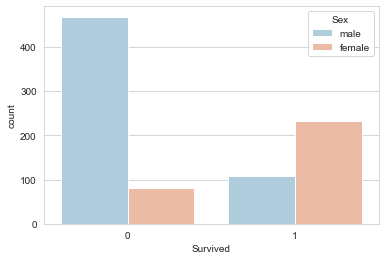

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

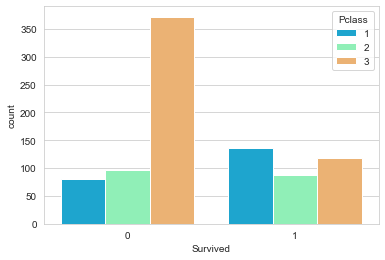

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:>

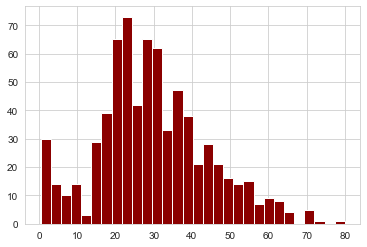

In [115]:
train['Age'].hist(bins=30,color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

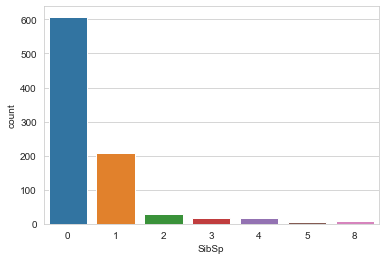

In [116]:
sns.countplot(x='SibSp',data=train)

In [119]:
#Here 0 = Not Survived & 1 = Survived #
train['Survived'].value_counts() *100/len(train)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [122]:
train = train.drop(["PassengerId","Name","Ticket"], axis=1)

In [128]:
pd.get_dummies(train['Sex'],drop_first=True)
pd.get_dummies(train['Embarked'],drop_first=True)


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [129]:
train.isnull().sum

<bound method DataFrame.sum of      Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Cabin  Embarked
0       False   False  False  False  False  False  False   True     False
1       False   False  False  False  False  False  False  False     False
2       False   False  False  False  False  False  False   True     False
3       False   False  False  False  False  False  False  False     False
4       False   False  False  False  False  False  False   True     False
..        ...     ...    ...    ...    ...    ...    ...    ...       ...
886     False   False  False  False  False  False  False   True     False
887     False   False  False  False  False  False  False  False     False
888     False   False  False   True  False  False  False   True     False
889     False   False  False  False  False  False  False  False     False
890     False   False  False  False  False  False  False   True     False

[891 rows x 9 columns]>

In [132]:
train["Cabin"] = train["Cabin"].isna()
train= pd.get_dummies(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    bool   
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB


In [135]:
train["Age"][train["Age"].isna()] = train["Age"].mean()
train.count()

<ipython-input-135-c0eb18d5ee1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"][train["Age"].isna()] = train["Age"].mean()


Survived      891
Pclass        891
Age           891
SibSp         891
Parch         891
Fare          891
Cabin         891
Sex_female    891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

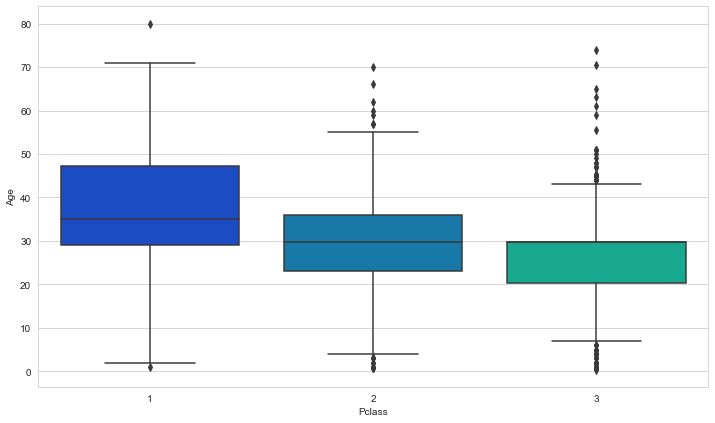

In [138]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [139]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [140]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

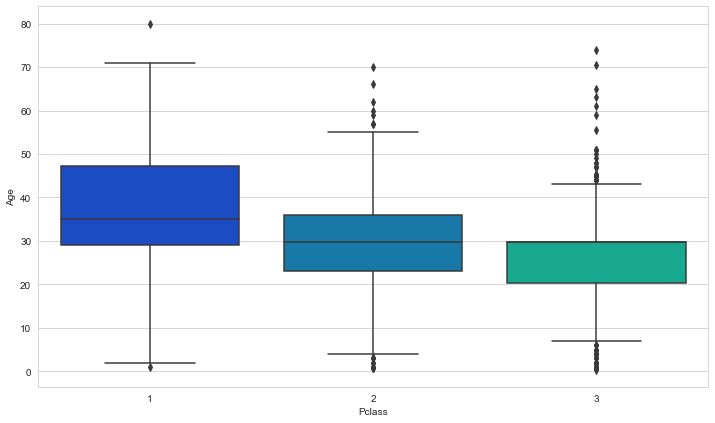

In [141]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

## Categorical Features 

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    bool   
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB


In [157]:
Cabin= pd.get_dummies(train['Cabin'],drop_first=True)
#embark = pd.get_dummies(train['Embarked'],drop_first=True)


In [158]:
#train.head()

In [71]:
#sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [159]:
#embark.head()

In [73]:
#train['Embarked']

1      C
3      S
6      S
10     S
11     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 202, dtype: object

In [160]:
train.shape

(891, 12)

In [161]:
sex.shape

(891, 1)

In [162]:
embark.shape

(891, 2)

In [163]:
##train = pd.concat([train,sex,embark],axis=1)

In [80]:
##train.drop(['Name', 'Ticket', 'Sex', 'Embarked','PassengerId'], axis = 1, inplace = True)

In [165]:
train.head()
Cabin.head()

,True
0,1
1,0
2,1
3,0
4,1


In [166]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    random_state=10)

## Training and Predicting

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\SOUVIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
predictions = logmodel.predict(X_test)

In [171]:
from sklearn.metrics import classification_report

In [172]:
from sklearn.metrics import accuracy_score

In [177]:
print(accuracy_score(y_test,predictions))

0.8156424581005587


In [156]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

